In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.preprocessing as prepoc
from sklearn.preprocessing import OneHotEncoder, StandardScaler
%matplotlib inline

### Loading data

In [2]:
data_dir = "../data/train.csv"
df = pd.read_csv(data_dir)

### Features that describe the basement of the house

- BsmtQual: Evaluates the height of the basement
- BsmtCond: Evaluates the general condition of the basement
- BsmtExposure: Refers to walkout or garden level walls
- BsmtFinType1: Rating of basement finished area
- BsmtFinSF1: Type 1 finished square feet
- BsmtFinType2: Rating of basement finished area (if multiple types)
- BsmtFinSF2: Type 2 finished square feet
- BsmtUnfSF: Unfinished square feet of basement area
- TotalBsmtSF: Total square feet of basement area

### Exploring column values of BsmtQual

In [3]:
df.BsmtQual.unique()

array(['Gd', 'TA', 'Ex', nan, 'Fa'], dtype=object)

In [4]:
df.BsmtQual.value_counts()

BsmtQual
TA    649
Gd    618
Ex    121
Fa     35
Name: count, dtype: int64

Over 97% of houses do have a basement

#### Checking how prices differentiate depending on the Basement height

In [5]:
basement_ql_series = df.BsmtQual.apply(lambda x: "No basement" if pd.isna(x) else x)
basement_ql_df = pd.DataFrame(basement_ql_series.values, columns=["BsmtQual"])
basement_ql_df.value_counts()

BsmtQual   
TA             649
Gd             618
Ex             121
No basement     37
Fa              35
Name: count, dtype: int64

In [6]:
basement_ql_df = pd.concat([basement_ql_df, df[["SalePrice"]]], axis=1)

In [7]:
avg_price_per_basement_ql = basement_ql_df.groupby("BsmtQual")["SalePrice"].mean().round().reset_index()
avg_price_per_basement_ql = avg_price_per_basement_ql.sort_values("SalePrice")
avg_price_per_basement_ql = avg_price_per_basement_ql.rename(columns={"SalePrice": "AvgSalePrice"})
avg_price_per_basement_ql

,BsmtQual,AvgSalePrice
3,No basement,105653.0
1,Fa,115692.0
4,TA,140760.0
2,Gd,202688.0
0,Ex,327041.0


It is seen that we can create at leat three binary features out of this column:
1. Binary feature to check a basement presence, namely - Basement
2. Binary feature to check whether the basement is very high (Ex category), namely - HBasement
3. Binary feature to check whether the basement has good enough height (Gd category), namely - GdeBasement
4. Binary feature to check whether the basement has a mediocre height(TA, FA, Po categories), namely - MBasement

### Exploring column values of BsmtCond

In [8]:
df.BsmtCond.unique()

array(['TA', 'Gd', nan, 'Fa', 'Po'], dtype=object)

In [9]:
df.BsmtCond.value_counts()

BsmtCond
TA    1311
Gd      65
Fa      45
Po       2
Name: count, dtype: int64

#### Checking how prices differentiate depending on the Basement condition

In [10]:
basement_cd_series = df.BsmtCond.apply(lambda x: "No basement" if pd.isna(x) else x)
basement_cd_df = pd.DataFrame(basement_cd_series.values, columns=["BsmtCond"])
basement_cd_df.value_counts()

BsmtCond   
TA             1311
Gd               65
Fa               45
No basement      37
Po                2
Name: count, dtype: int64

In [11]:
basement_cd_df = pd.concat([basement_cd_df, df[["SalePrice"]]], axis=1)

In [12]:
avg_price_per_basement_cd = basement_cd_df.groupby("BsmtCond")["SalePrice"].mean().round().reset_index()
avg_price_per_basement_cd = avg_price_per_basement_cd.sort_values("SalePrice")
avg_price_per_basement_cd = avg_price_per_basement_cd.rename(columns={"SalePrice": "AvgSalePrice"})
avg_price_per_basement_cd

,BsmtCond,AvgSalePrice
3,Po,64000.0
2,No basement,105653.0
0,Fa,121810.0
4,TA,183633.0
1,Gd,213600.0


Probably there is a need to create a binary feature for each of the categories

### Exploring column values of BsmtExposure

In [13]:
df.BsmtExposure.unique()

array(['No', 'Gd', 'Mn', 'Av', nan], dtype=object)

In [14]:
df.BsmtExposure.value_counts()

BsmtExposure
No    953
Av    221
Gd    134
Mn    114
Name: count, dtype: int64

Over 67% of houses that have a basement - are not exposed

#### Checking how prices differentiate depending on the Basement exposure

In [15]:
basement_exp_series = df.BsmtExposure.apply(lambda x: "No basement" if pd.isna(x) else x)
basement_exp_df = pd.DataFrame(basement_exp_series.values, columns=["BsmtExposure"])
basement_exp_df.value_counts()

BsmtExposure
No              953
Av              221
Gd              134
Mn              114
No basement      38
Name: count, dtype: int64

In [16]:
basement_exp_df = pd.concat([basement_exp_df, df[["SalePrice"]]], axis=1)

In [17]:
avg_price_per_basement_exp = basement_exp_df.groupby("BsmtExposure")["SalePrice"].mean().round().reset_index()
avg_price_per_basement_exp = avg_price_per_basement_exp.sort_values("SalePrice")
avg_price_per_basement_exp = avg_price_per_basement_exp.rename(columns={"SalePrice": "AvgSalePrice"})
avg_price_per_basement_exp

,BsmtExposure,AvgSalePrice
4,No basement,107938.0
3,No,165652.0
2,Mn,192790.0
0,Av,206643.0
1,Gd,257690.0


There is a need to create a separate binary feature for each of the categories except for Mn and Av, for them we can create a single binary feature, namely - MidExp, since their avg prices are not drastically different

### Exploring column values of BsmtFinType1

In [18]:
df.BsmtFinType1.unique()

array(['GLQ', 'ALQ', 'Unf', 'Rec', 'BLQ', nan, 'LwQ'], dtype=object)

In [19]:
df.BsmtFinType1.value_counts()

BsmtFinType1
Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: count, dtype: int64

#### Checking how prices differentiate depending on the rating of the basement finished area

In [20]:
basement_fintp1_series = df.BsmtFinType1.apply(lambda x: "No basement" if pd.isna(x) else x)
basement_fintp1_df = pd.DataFrame(basement_fintp1_series.values, columns=["BsmtFinType1"])
basement_fintp1_df.value_counts()

BsmtFinType1
Unf             430
GLQ             418
ALQ             220
BLQ             148
Rec             133
LwQ              74
No basement      37
Name: count, dtype: int64

In [21]:
basement_fintp1_df = pd.concat([basement_fintp1_df, df[["SalePrice"]]], axis=1)

In [22]:
avg_price_per_basement_fintp1 = basement_fintp1_df.groupby("BsmtFinType1")["SalePrice"].mean().round().reset_index()
avg_price_per_basement_fintp1 = avg_price_per_basement_fintp1.sort_values("SalePrice")
avg_price_per_basement_fintp1 = avg_price_per_basement_fintp1.rename(columns={"SalePrice": "AvgSalePrice"})
avg_price_per_basement_fintp1

,BsmtFinType1,AvgSalePrice
4,No basement,105653.0
5,Rec,146889.0
1,BLQ,149494.0
3,LwQ,151853.0
0,ALQ,161573.0
6,Unf,170671.0
2,GLQ,235414.0


Concluding, we can make the following binary features:
1. GLQ - Good Living Quarters
2. UnfQ - Unfinshed Living Quarters
3. ALQ - Average Living Quarters
4. LwQ - Low Quality Living Quarters (encompasses LwQ, BLQ, Rec)

### Exploring column values of BsmtFinType2

In [23]:
df.BsmtFinType2.unique()

array(['Unf', 'BLQ', nan, 'ALQ', 'Rec', 'LwQ', 'GLQ'], dtype=object)

In [24]:
df.BsmtFinType2.value_counts()

BsmtFinType2
Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: count, dtype: int64

#### Checking how prices differentiate depending on the rating of the basement finished area (if multiple types)

In [25]:
basement_fintp2_series = df.BsmtFinType2.apply(lambda x: "No basement" if pd.isna(x) else x)
basement_fintp2_df = pd.DataFrame(basement_fintp2_series.values, columns=["BsmtFinType2"])
basement_fintp2_df.value_counts()

BsmtFinType2
Unf             1256
Rec               54
LwQ               46
No basement       38
BLQ               33
ALQ               19
GLQ               14
Name: count, dtype: int64

In [26]:
basement_fintp2_df = pd.concat([basement_fintp2_df, df[["SalePrice"]]], axis=1)

In [27]:
avg_price_per_basement_fintp2 = basement_fintp2_df.groupby("BsmtFinType2")["SalePrice"].mean().round().reset_index()
avg_price_per_basement_fintp2 = avg_price_per_basement_fintp2.sort_values("SalePrice")
avg_price_per_basement_fintp2 = avg_price_per_basement_fintp2.rename(columns={"SalePrice": "AvgSalePrice"})
avg_price_per_basement_fintp2

,BsmtFinType2,AvgSalePrice
4,No basement,110346.0
1,BLQ,151101.0
3,LwQ,164364.0
5,Rec,164917.0
2,GLQ,180982.0
6,Unf,184695.0
0,ALQ,209942.0


### Exploring column values of BsmtFinSF1

In [28]:
df.BsmtFinSF1.describe()

count    1460.000000
mean      443.639726
std       456.098091
min         0.000000
25%         0.000000
50%       383.500000
75%       712.250000
max      5644.000000
Name: BsmtFinSF1, dtype: float64

In [31]:
n_nan = df.BsmtFinSF1.isna().sum().item()
print(f"Number of nans in BsmtFinSF1: {n_nan}")

Number of nans in BsmtFinSF1: 0


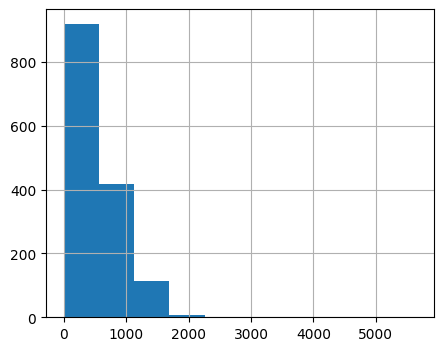

In [37]:
df.BsmtFinSF1.hist(bins=10, figsize=(5, 4))
plt.show()

Feature is needed to be standardized

### Exploring column values of BsmtFinSF2

In [38]:
df.BsmtFinSF2.describe()

count    1460.000000
mean       46.549315
std       161.319273
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max      1474.000000
Name: BsmtFinSF2, dtype: float64

In [39]:
n_nan = df.BsmtFinSF2.isna().sum().item()
print(f"Number of nans in BsmtFinSF2: {n_nan}")

Number of nans in BsmtFinSF2: 0


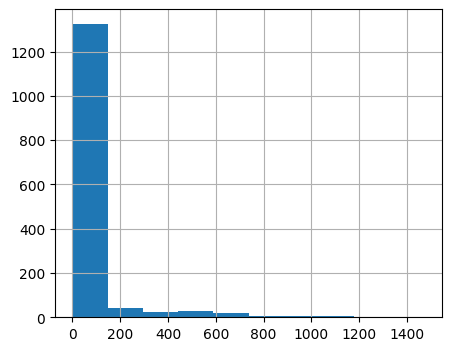

In [40]:
df.BsmtFinSF2.hist(bins=10, figsize=(5, 4))
plt.show()

Feature is clearly needed to be standardized

### Exploring column values of BsmtUnfSF

In [41]:
df.BsmtUnfSF.describe()

count    1460.000000
mean      567.240411
std       441.866955
min         0.000000
25%       223.000000
50%       477.500000
75%       808.000000
max      2336.000000
Name: BsmtUnfSF, dtype: float64

In [43]:
n_nan = df.BsmtUnfSF.isna().sum().item()
print(f"Number of nans in BsmtUnfSF: {n_nan}")

Number of nans in BsmtUnfSF: 0


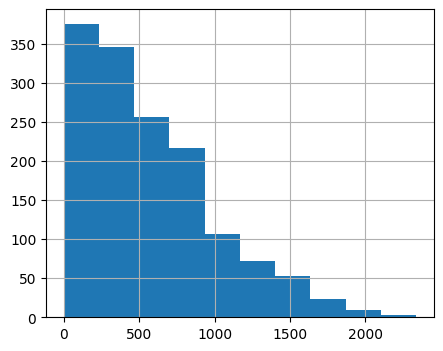

In [44]:
df.BsmtUnfSF.hist(bins=10, figsize=(5, 4))
plt.show()

Feature is clearly needed to be standardized

### Exploring column values of TotalBsmtSF

In [45]:
df.TotalBsmtSF.describe()

count    1460.000000
mean     1057.429452
std       438.705324
min         0.000000
25%       795.750000
50%       991.500000
75%      1298.250000
max      6110.000000
Name: TotalBsmtSF, dtype: float64

In [46]:
n_nan = df.TotalBsmtSF.isna().sum().item()
print(f"Number of nans in TotalBsmtSF: {n_nan}")

Number of nans in TotalBsmtSF: 0


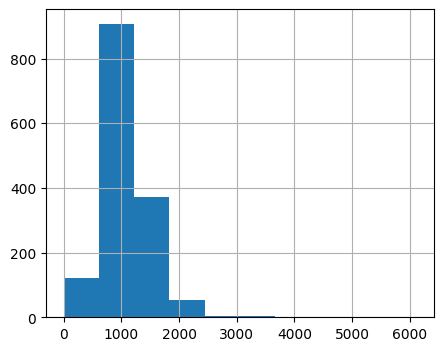

In [47]:
df.TotalBsmtSF.hist(bins=10, figsize=(5, 4))
plt.show()

Feature is clearly needed to be standardized